<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Изучения-столбцов-и-проверка-данных" data-toc-modified-id="Изучения-столбцов-и-проверка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучения столбцов и проверка данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

## Введение

В данном проекте мы решим задачу в рамках темы "Линейная алгебра", по проекту "Защита персональных данных клиентов".

Ниже можно найти описание задачи, а также примерный план проекта.

<b>Описание задачи:</b>

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<b>План работы над проектом:</b>
- Изучение общей информации о файле с данными.
- Изучение столбцов и проверка данных.
- Раскрытие теоритических вопросов.
- Создание метода преобразования данных.
- Обучение моделей.
- Общий вывод.
- Чек-лист проекта.

<b>Автор проекта:</b>
- Виктория Кускова, 
- студентка Яндекс.Практикума, 2021.

## Загрузка данных

### Общая информация

Выделим импорты всех библиотек, импорт файла с данными и общую информацию по нему в отдельные ячейки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#импорт файла с данными
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В нашей таблице 5000 строк, 5 столбцов, 1 из которых - целевой признак.

Пропусков нет, это хорошо. Посмотрим на первые строки датасета.

In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Видим, что в первых строках порядок данных выглядит правдоподобно. Посмотрим внимательнее на значение в столбцах и, на всякий случай, проверим слолбцы на другие потенциальные ошибки.

### Изучения столбцов и проверка данных

Перед изучением стобцов посмотрим на основные характеристики. Они могут помочб нам для дальнейшего анализа.

In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Проверим данные в столбцах "Пол", "Члены семьи" и "Страховые выплаты".

In [6]:
df['Пол'].nunique(), df['Члены семьи'].nunique(), df['Страховые выплаты'].nunique()

(2, 7, 6)

Значий пола тольк 2 вида - это хорошо, вероятно ошибок нет. По другим столбцам тоже не огромное число значений, это хорошо, но посмотрим еще и на их более подробное распределение по значениям.

In [7]:
df['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

In [8]:
df['Члены семьи'].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

In [9]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

Видим, что распределение по полу - почти равное, это выглядит правдоподобно. Для других двух столбцов тоже видно, что при увеличении значений - частота снижается. Только у количества детей пик в 1, а потом идет 0 и затем 2. А по количеству страховых выплат максимум у 0 выплат и после уже 1, 2... Это также выглядит правдоподобно. 

Теперь проверим оставшиеся столбцы.

Посмотрим на столбец с возрастом, число корзин возьмем как количество возможных целых лет в наших данных. Для этого воспользуемся максимальными и минимальными значеними из таблицы выше с основнвми показателями: минимум - 18, максимум - 65 - всего 48 уникальных целых лет.

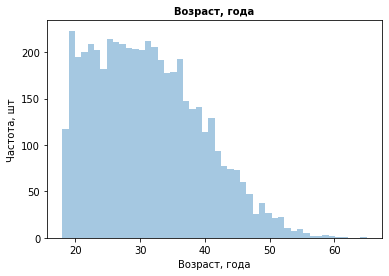

In [10]:
plt.title("Возраст, года", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=df['Возраст'], bins=48, kde=False, rug=False, axlabel="Возраст, года")
plt.show()

Видим, что чем больше возраст, тем плавно снижается число клиентов. Нет неожиданных пиков и выделяющихся значений. Это хорошо.

Теперь посмотрим на зарплаты.

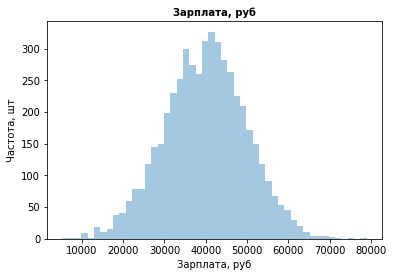

In [11]:
plt.title("Зарплата, руб", fontweight='bold', size='medium')
plt.ylabel("Частота, шт")
sns.distplot(a=df['Зарплата'], kde=False, rug=False, axlabel="Зарплата, руб")
plt.show()

Также нет неожиданных всплесков, распределение похоже на нормальное.

Первичная проверка данных показала, что вероятно ошибок в данных нет. Это зорошо, переходим к следующим шагам.

## Умножение матриц

Ответим в данном разделе на один из вопросов задачи:

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- Изменится. Приведите примеры матриц.
- Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

А ниже вы можете найти небольшую <b> инструкцию для оформления математических текстов</b>:

"В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно."

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  Качество модели линейной регрессии не изменится после умножения на обратимую матрицу.

**Обоснование:** 

Давайте сравним, как будет обучаться модель при линейной регрессии на матрице X и матрице XP, где 𝑃  — обратимая матрица, на которую умножаются признаки. Нам необходимо сравниь расчет a и w для матриц X и XP.


<b>Расчет w и a для X:</b>
Возьмем формулы из условия задачи и посмотрим как выражается предсказания a уже через X и y:

$$
w = (X^T X)^{-1} X^T y
$$


$$
a = Xw = X (X^T X)^{-1} X^T y
$$

<b>Расчет w и a для XP:</b>
Также посмотрим как выражается предсказания a уже через X и y, а также обратимую матрицу P:

$$
w = ((XP)^T (XP))^{-1} (XP)^T y
$$


$$
a = XPw = XP((XP)^T (XP))^{-1} (XP)^T y
$$

Формула выглядит достточно большой, попробуем ее преобразовать. Для этого нам могут понадобиться свойства обратных и транспонированных матриц:
- Свойство операции транспонирования матриц: $(AB)^T = B^T
A^T$ 
- Свойство обратной матрицы: $(AB)^{-1} = B^{-1} A^{-1}$
- Свойство обратной матрицы: $ A^{-1} A = A A^{-1} = E $
- Свойство обратной матрицы: $(A^T)^{-1} = (A^{-1})^T$. 

Важно помнить, что обратная матрица есть только у квадратной, поэтому эти свойства для обратных матриц мы можем применять к квадратным матрицам. Квадратные матрицы - это точно: 
- Наша матрица P, так как по условию мы знаем, что она квадратная, так как обратимая.
- Также матрицы, которые являются результатом умножения матрицы на себя транспонированную - они тоже всегда квадратные (потому если размер матрицы был $m*n$, то у транспонированной будет $n*m$, а у их произвеведения - $m*m$).
- Или если это транспонированные матрицы перечиленных матриц.


Применим для формулы a свойство 1 для транспонированной матрицы:

$$
a = XP ((XP)^T (XP))^{-1} (XP)^T y = XP (P^T X^T X P)^{-1} P^T X^T y
$$

Теперь внимательно посмотрим на содержимое внутри скобок. Изначально это была квадратная матрица, так как это так как это произведение матрицы, умноженной на транспонированную $(XP)^T (XP)$. Тепреь мы видим, что после преобразование последний множитель - это квадратная матрица P. Значит и $P^T X^T X$ тоже квадратная.

Это можно легко доказать от обратного: пусть она не квадратная, размера $m*n$, где m не равно n, тогда у квадратной матрицы P должен быть размер $n*n$ - чтобы умножение было возможно. тогда у всего соержимого скобок размер должен быть $m*n$. Но это не квадратная матрица, так как m не равно n. А должна быть квадратная, так как это произведение матрицы, умноженной на транспонированную $(XP)^T (XP)$. Противоречие! Поэтому $P^T X^T X$ тоже квадратная.

Применим свойство обратной матрицы, номер 2 в нашем общем списке:

$$
a = XP (P^T X^T X P)^{-1} P^T X^T y = XP P^{-1}(P^T X^T X)^{-1}P^T X^T y
$$

Видим, что у нас появилось рядом произведение $P P^{-1}$. Оно равно E матрице (свойство 3 из нашего списка), а произведение единичной матрицы на другую матрицу равно этой матрице. Применим это:

$$
a = XP P^{-1}(P^T X^T X)^{-1}P^T X^T y = X E (P^T X^T X)^{-1}P^T X^T y = X (P^T X^T X)^{-1}P^T X^T y
$$


Теперь применим свойство номер 2 еще раз к содержимому скобок. внутри есть 2 квадратные матрицы: $P^T$ и $X^T X$:

$$
a =  X (P^T X^T X)^{-1}P^T X^T y = X(X^T X)^{-1}(P^T)^{-1}P^T X^T y
$$

Опять видим рядом умножение матрицы $(P^T)$ и обратной ей. А значит, что можем сократить это.

$$
a =  X(X^T X)^{-1}(P^T)^{-1}P^T X^T y = X(X^T X)^{-1} X^T y
$$


Теперь сравним этот результат и расчет a для просто X. Они совпадают: $a = X(X^T X)^{-1} X^T y$!

А значит, что предсказания не изменятся после умножения на обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

Изпользуя рассуждения выше, для защиты данных клиентов страховой компании «Хоть потоп» можно предложить метод преобразования данных - умножение признаков на обратимую матрицу. 

А именно следующие шаги:
- Разделяем признаки и целевой признак в разные сущности.
- Создаем функцию для кодирования матрицы с признаками. А именно:
- Генерируем рандомную квадратную матрицу, исходя из размера датасета с признаками.
- Проверяем эту матрицу на обратимость.
- Умножаем матрицу с признаками на рандомную квадратную.
- Обучаем модель линейной регресии дважды: сначала на неизмененных данных, а потом на закодированных.
- Сравниваем R2 метрики у полученных предсказаний.

**Обоснование**

Матрицу для кодирования данных можно подбирать случайным методом, тогда при умножении на нее - качество предсказаний не изменится, как мы доказали выше. А подобрать матрицу для разблокировки данных будем сложно. Ведь для такой матрицы размера $4*4$ нужно перебрать около $10^{16}$ вариантов матриц.

## Проверка алгоритма

Для начала выделим из нашего датасета целевой и другие признаки.

In [12]:
target = df['Страховые выплаты']
features = df.drop('Страховые выплаты', axis=1)

In [13]:
features.shape

(5000, 4)

Напишем функцию, которая преобразует исходную матрицу, умножая ее на случайную обратимую.

In [14]:
class ConvertingMatrix:
    def converting(self, X):
        self.X = X
        self.P_length = self.X.shape[1]
        np.random.seed(123)
        self.P = np.random.normal(size=(self.P_length, self.P_length))
        try:
            self.P_inv = np.linalg.inv(self.P)
            print("Success! That was an inverse matrix.")
            self.X_conv = self.X @ self.P
            return self.X_conv
        except ValueError:
            print("Oops!  That was no inverse matrix.  Try again...")  

In [15]:
features_new = ConvertingMatrix().converting(features)

Success! That was an inverse matrix.


In [16]:
features_new.head()

,0,1,2,3
0,62767.121580,-42922.256611,-33772.407973,-4717.090923
1,48080.453609,-32860.808107,-25909.744989,-3619.105152
2,26567.882026,-18153.656788,-14326.982882,-2001.326814
3,52780.374162,-36109.672411,-28361.400751,-3959.239872
4,33023.649915,-22574.686931,-17786.592598,-2485.419938


Видим, что матрица с признаками действительно сильно изменилась и не похожа на исходные данные. Данные закодировали.

Теперь применим модель линейной регрессии для преобразованных и нет признаков. И оценим качество по оценке r2.

In [17]:
model = LinearRegression()

In [18]:
model.fit(features, target) 

predictions = model.predict(features)
r2_before = r2_score(target, predictions)

In [19]:
model.fit(features_new, target) 

predictions_new = model.predict(features_new)
r2_after = r2_score(target, predictions_new)

In [20]:
r2_before, r2_after

(0.42494550286668, 0.424945502866682)

Видим, что значения очень похожи, но на определенном знаке после запятой начитаются различия. Чтобы понять существенные ли они воспользуемся функцией isclose.

In [21]:
np.isclose(r2_before, r2_after)

True

Видим, что значения одинаковые. Это означает, что мы на практике проверили наши рассуждения выше.

## Вывод

<b>Краткие выводы проекта:</b>
- В сете с данными, состоящем из 5000 строк не было обнаружено пропусков и ошибок.
- Был разобран вопрос о качестве моделей, если перед обучением матрицу с признаками умножать на обратимую матрицу.
- Было выведено теоритически, что в таком случае качество модели не изменится.
- Данный способ был запрограммирован и применен на сете с нашими данными.
- На практике было выявлено, что качество моделей действительно не отличается для моделей, построенных на исходных данных, и для моделей закодированных с помощью умножения на обратимую матрицу.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования